In [25]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StringIndexer

In [48]:
# Loads data.
df = spark.read.csv('/tmp/haupv/Mall_Customers.csv', header=True,inferSchema=True)

In [49]:
df.describe()

DataFrame[summary: string, CustomerID: string, Gender: string, Age: string, Annual Income (k$): string, Spending Score (1-100): string]

In [34]:
#  encoding categorical column
indexer =  StringIndexer() \
                    .setInputCol("Gender") \
                   .setOutputCol("genderIndex") \
                   .fit(df)

df = indexer.transform(df)

In [35]:
df.head(5)

[Row(CustomerID=1, Gender=u'Male', Age=19, Annual Income (k$)=15, Spending Score (1-100)=39, genderIndex=1.0),
 Row(CustomerID=2, Gender=u'Male', Age=21, Annual Income (k$)=15, Spending Score (1-100)=81, genderIndex=1.0),
 Row(CustomerID=3, Gender=u'Female', Age=20, Annual Income (k$)=16, Spending Score (1-100)=6, genderIndex=0.0),
 Row(CustomerID=4, Gender=u'Female', Age=23, Annual Income (k$)=16, Spending Score (1-100)=77, genderIndex=0.0),
 Row(CustomerID=5, Gender=u'Female', Age=31, Annual Income (k$)=17, Spending Score (1-100)=40, genderIndex=0.0)]

In [18]:
# df = df.drop('CustomerID')
# df.head(5)

[Row(Gender=u'Male', Age=19, Annual Income (k$)=15, Spending Score (1-100)=39),
 Row(Gender=u'Male', Age=21, Annual Income (k$)=15, Spending Score (1-100)=81),
 Row(Gender=u'Female', Age=20, Annual Income (k$)=16, Spending Score (1-100)=6),
 Row(Gender=u'Female', Age=23, Annual Income (k$)=16, Spending Score (1-100)=77),
 Row(Gender=u'Female', Age=31, Annual Income (k$)=17, Spending Score (1-100)=40)]

In [50]:
# Create feature vector
from pyspark.ml.feature import VectorAssembler

ignore = ['CustomerID', 'Gender', 'genderIndex']
assembler = VectorAssembler(
    inputCols=[x for x in df.columns if x not in ignore],
    outputCol='features')

df = assembler.transform(df)

In [51]:
# Trains a k-means model.
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(df)

In [60]:
df = model.transform(df)

In [55]:
clustered.head(5)

[Row(CustomerID=1, Gender=u'Male', Age=19, Annual Income (k$)=15, Spending Score (1-100)=39, features=DenseVector([19.0, 15.0, 39.0]), prediction=1),
 Row(CustomerID=2, Gender=u'Male', Age=21, Annual Income (k$)=15, Spending Score (1-100)=81, features=DenseVector([21.0, 15.0, 81.0]), prediction=0),
 Row(CustomerID=3, Gender=u'Female', Age=20, Annual Income (k$)=16, Spending Score (1-100)=6, features=DenseVector([20.0, 16.0, 6.0]), prediction=1),
 Row(CustomerID=4, Gender=u'Female', Age=23, Annual Income (k$)=16, Spending Score (1-100)=77, features=DenseVector([23.0, 16.0, 77.0]), prediction=0),
 Row(CustomerID=5, Gender=u'Female', Age=31, Annual Income (k$)=17, Spending Score (1-100)=40, features=DenseVector([31.0, 17.0, 40.0]), prediction=1)]

In [61]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(df)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.502696445319
Cluster Centers: 
[39.21212121 48.07070707 56.64646465]
[45.2173913  26.30434783 20.91304348]
[32.69230769 86.53846154 82.12820513]
[39.42857143 77.96428571 18.35714286]
[ 42.63636364 108.18181818  21.27272727]


In [75]:
df.columns

Index([u'Age', u'Annual Income (k$)', u'Spending Score (1-100)', u'features',
       u'prediction'],
      dtype='object')

In [71]:
df = df.drop(['CustomerID', 'Gender'],axis=1)

In [74]:
df.shape

(200, 5)

In [96]:
centers = np.array(model.clusterCenters())
centers

array([[ 39.21212121,  48.07070707,  56.64646465],
       [ 45.2173913 ,  26.30434783,  20.91304348],
       [ 32.69230769,  86.53846154,  82.12820513],
       [ 39.42857143,  77.96428571,  18.35714286],
       [ 42.63636364, 108.18181818,  21.27272727]])

In [98]:
centers[:,0]

array([39.21212121, 45.2173913 , 32.69230769, 39.42857143, 42.63636364])

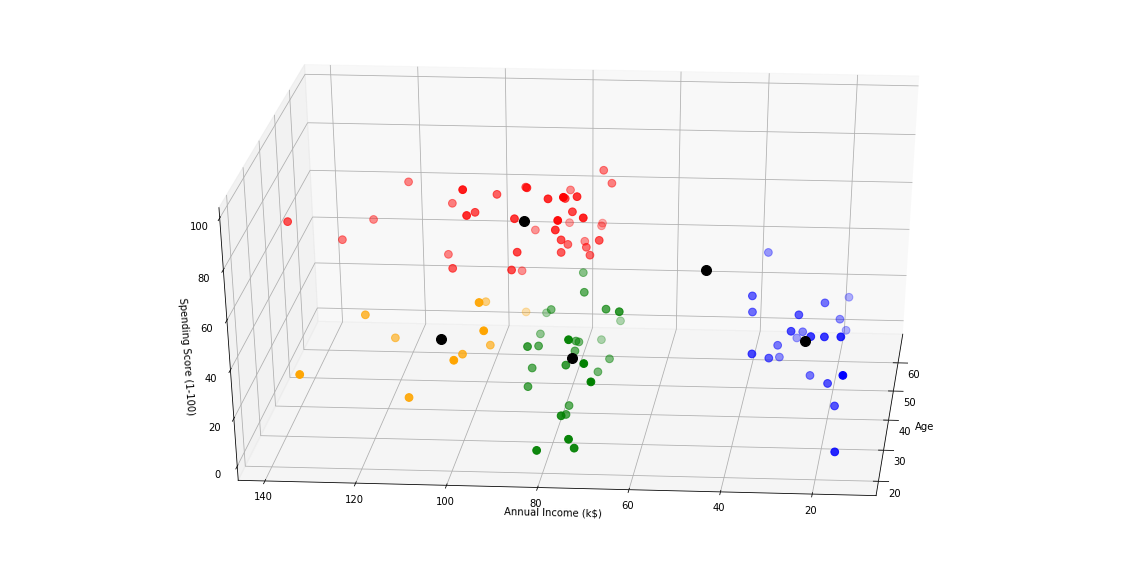

In [100]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.prediction == 1], df["Annual Income (k$)"][df.prediction == 1], df["Spending Score (1-100)"][df.prediction == 1], c='blue', s=60)
ax.scatter(df.Age[df.prediction == 2], df["Annual Income (k$)"][df.prediction == 2], df["Spending Score (1-100)"][df.prediction == 2], c='red', s=60)
ax.scatter(df.Age[df.prediction == 3], df["Annual Income (k$)"][df.prediction == 3], df["Spending Score (1-100)"][df.prediction == 3], c='green', s=60)
ax.scatter(df.Age[df.prediction == 4], df["Annual Income (k$)"][df.prediction == 4], df["Spending Score (1-100)"][df.prediction == 4], c='orange', s=60)
ax.scatter(df.Age[df.prediction == 5], df["Annual Income (k$)"][df.prediction == 5], df["Spending Score (1-100)"][df.prediction == 5], c='purple', s=60)

# plot centers
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c='black',s=100,depthshade=False)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()